In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Задание 1

In [2]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

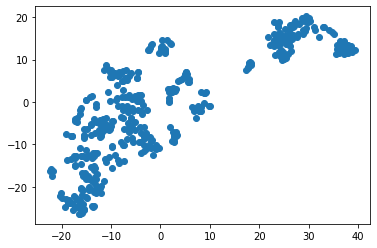

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2

In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

1    191
2    127
0     86
dtype: int64

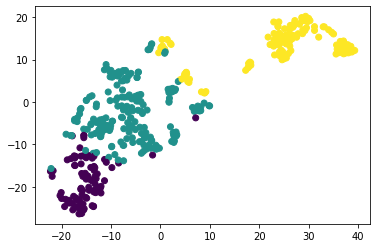

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [41]:
print(y_train.loc[labels_train==1, 'price'].mean()),
print(y_train.loc[labels_train==2, 'price'].mean()),
print(y_train.loc[labels_train==0, 'price'].mean())

24.958115183246072
16.165354330708666
27.788372093023252


In [42]:
print(X_train.loc[labels_train==1, 'CRIM'].mean()),
print(X_train.loc[labels_train==2, 'CRIM'].mean()),
print(X_train.loc[labels_train==0, 'CRIM'].mean())

0.42166020942408367
10.797028425196853
0.07356558139534886


## Задание 3

In [43]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

1    51
2    35
0    16
dtype: int64

In [44]:
print(y_test.loc[labels_test==1, 'price'].mean()),
print(y_test.loc[labels_test==2, 'price'].mean()),
print(y_test.loc[labels_test==0, 'price'].mean())

21.860784313725492
16.437142857142856
31.35


In [45]:
print(X_test.loc[labels_test==1, 'CRIM'].mean()),
print(X_test.loc[labels_test==2, 'CRIM'].mean()),
print(X_test.loc[labels_test==0, 'CRIM'].mean())

0.26607882352941176
10.165531142857143
0.062060000000000004
